In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv('new_appdata10.csv')

#### Data Pre-Processing ####

In [3]:
# Splitting Independent and Response Variables

response = dataset["enrolled"]

dataset = dataset.drop(columns="enrolled")

In [4]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)


In [5]:
# Removing Identifiers

train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])

test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [8]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, penalty = 'l2')

classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [24]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [10]:
# Evaluating Results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)


0.7658930373360243

In [25]:
precision_score(y_test, y_pred)       # tp / (tp + fp)

0.7617422721798475

In [26]:
recall_score(y_test, y_pred)              # tp / (tp + fn)

0.7700892857142857

In [27]:
f1_score(y_test, y_pred)

0.7658930373360243

Test Data Accuracy: 0.7680


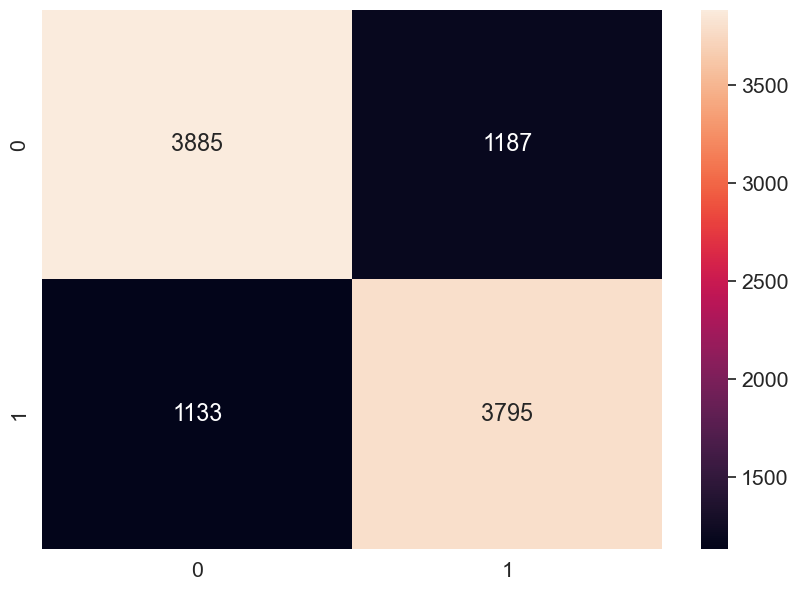

In [11]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [31]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.767 (+/- 0.009)


In [23]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)


